LAB - 7

QUESTION A1 - For the data table provided below, calculate the entropy associated with each attribute / feature 
at the root node. Using this information, identify the first feature that you’d select for constructing 
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label.

In [16]:
import pandas as pd

#Define the data
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

#Create a DataFrame
df = pd.DataFrame(data)

In [24]:
#entry for each feature

import numpy as np

#function to calculate entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

#calculate the entropy of the target variable
target_entropy = entropy(df['buys_computer'])

#dictionary to hold the entropy values
entropy_dict = {'Attribute': [], 'Entropy': []}

#calculate entropy for each attribute
for attribute in df.columns[:-1]:  #exclude the target variable
    entropy_values = []
    for value in df[attribute].unique():
        subset = df[df[attribute] == value]
        subset_entropy = entropy(subset['buys_computer'])
        entropy_values.append(subset_entropy * (len(subset) / len(df)))  #weighted by proportion
    total_entropy = sum(entropy_values)
    
    entropy_dict['Attribute'].append(attribute)
    entropy_dict['Entropy'].append(total_entropy)

#create a DataFrame for entropy results
entropy_results = pd.DataFrame(entropy_dict)

# Create a DataFrame for the target variable's entropy
target_entropy_df = pd.DataFrame({'Attribute': ['buys_computer'], 'Entropy': [target_entropy]})

# Concatenate the target variable's entropy to the results
entropy_results = pd.concat([entropy_results, target_entropy_df], ignore_index=True)

# Display the results
print(entropy_results)

       Attribute   Entropy
0            age  0.693536
1         income  0.911063
2        student  0.788450
3  credit_rating  0.892159
4  buys_computer  0.940286


In [28]:
#identifying 1st feature to select for conastructing a decision tree

#function to calculate information gain
def information_gain(data, feature, target_entropy):
    feature_values = data[feature]
    target_values = data['buys_computer']
    
    #calculate weighted entropy for each feature value
    weighted_entropy = 0
    for value in np.unique(feature_values):
        subset = target_values[feature_values == value]
        weighted_entropy += (len(subset) / len(target_values)) * entropy(subset)
    
    return target_entropy - weighted_entropy

#calculate information gain for each feature
info_gain_dict = {'Feature': [], 'Information Gain': []}
for feature in df.columns[:-1]:  # Exclude target column
    info_gain = information_gain(df, feature, target_entropy)
    info_gain_dict['Feature'].append(feature)
    info_gain_dict['Information Gain'].append(info_gain)

#create a DataFrame for Information Gain results
info_gain_results = pd.DataFrame(info_gain_dict)

#identify the feature with the highest Information Gain
best_feature = info_gain_results.loc[info_gain_results['Information Gain'].idxmax()]

#output 
print("Information Gain Results:")
print(info_gain_results)
print("\nFeature selected for constructing the decision tree:-")
print(f"Feature: {best_feature['Feature']}, Information Gain: {best_feature['Information Gain']}")

Information Gain Results:
         Feature  Information Gain
0            age          0.246750
1         income          0.029223
2        student          0.151836
3  credit_rating          0.048127

Feature selected for constructing the decision tree:-
Feature: age, Information Gain: 0.24674981977443933


QUESTION - 2 : Create a Decision Tree for the above data. Get the depth of the constructed tree.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [37]:
#convert categorical features to numerical values
df_encoded = pd.get_dummies(df, drop_first=True)

#split the data into features and target variable
X = df_encoded.drop('buys_computer_yes', axis=1)  # Features
y = df_encoded['buys_computer_yes']                # Target variable

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
#create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

#fit the model on the training data
clf.fit(X_train, y_train)

#get the depth of the constructed tree
tree_depth = clf.get_depth()

#output the depth of the tree
print(f"Depth of the constructed tree: {tree_depth}")

Depth of the constructed tree: 3


QUESTION 3 - Visualize the constructed tree with plot_tree() command.

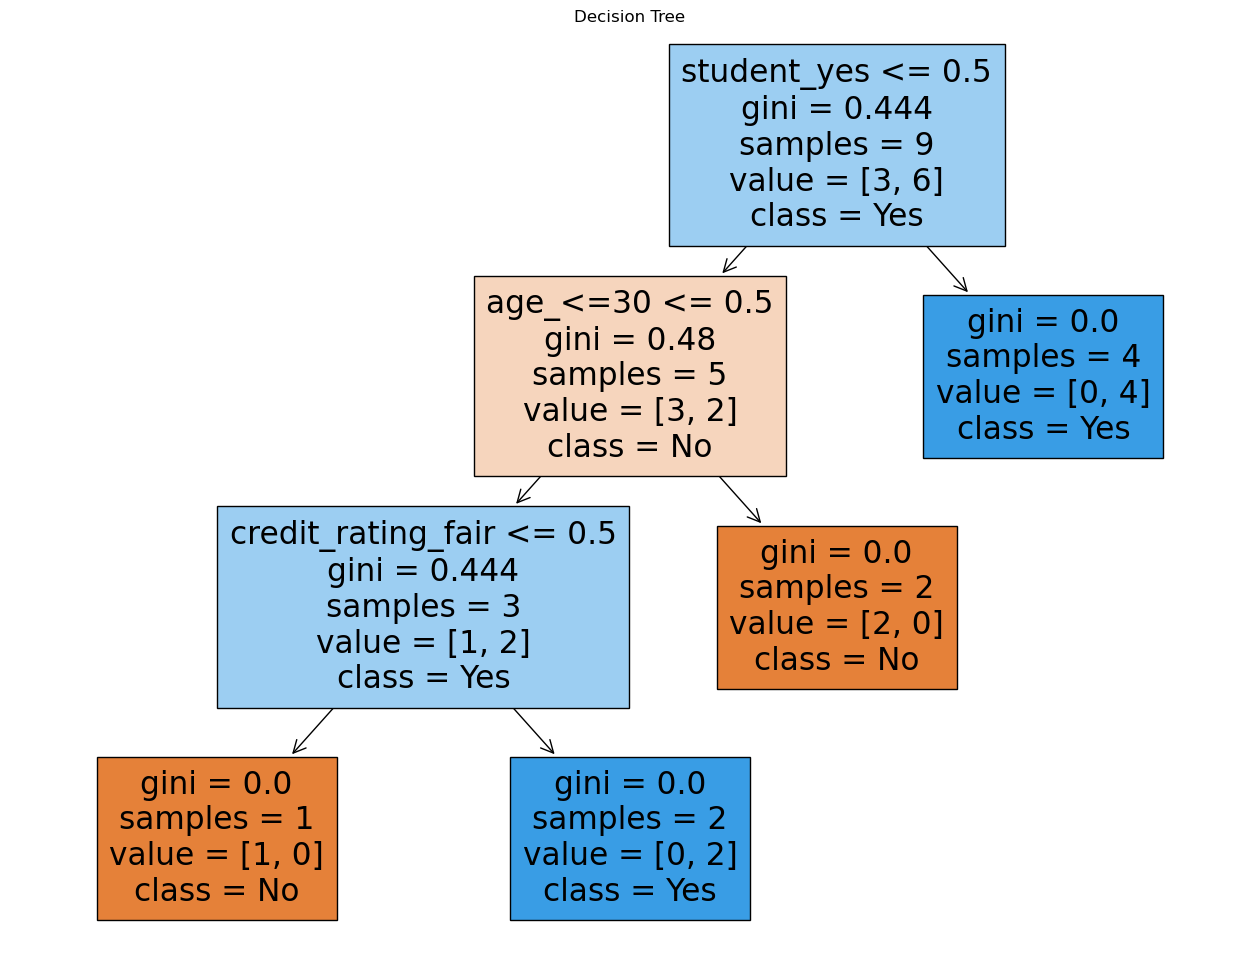

In [50]:
#visualize the tree
plt.figure(figsize=(16, 12))
tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.title('Decision Tree')
plt.show()

QUESTION 4 - Create a Decision Tree classifier on your project data. Study the accuracy for training and test 
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above.

In [59]:
file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(file_path)

# Fill null values with the mean of each column
data['absolute_magnitude'].fillna(data['absolute_magnitude'].mean(), inplace=True)
data['estimated_diameter_min'].fillna(data['estimated_diameter_min'].mean(), inplace=True)
data['estimated_diameter_max'].fillna(data['estimated_diameter_max'].mean(), inplace=True)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#drop unnecessary columns
data = data.drop(columns=['name'])

#convert categorical columns to numerical representations
data = pd.get_dummies(data, drop_first=True)

#define features and target variable
X = data.drop(columns=['is_hazardous'])
y = data['is_hazardous']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Create and fit the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy for training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9666469544648137


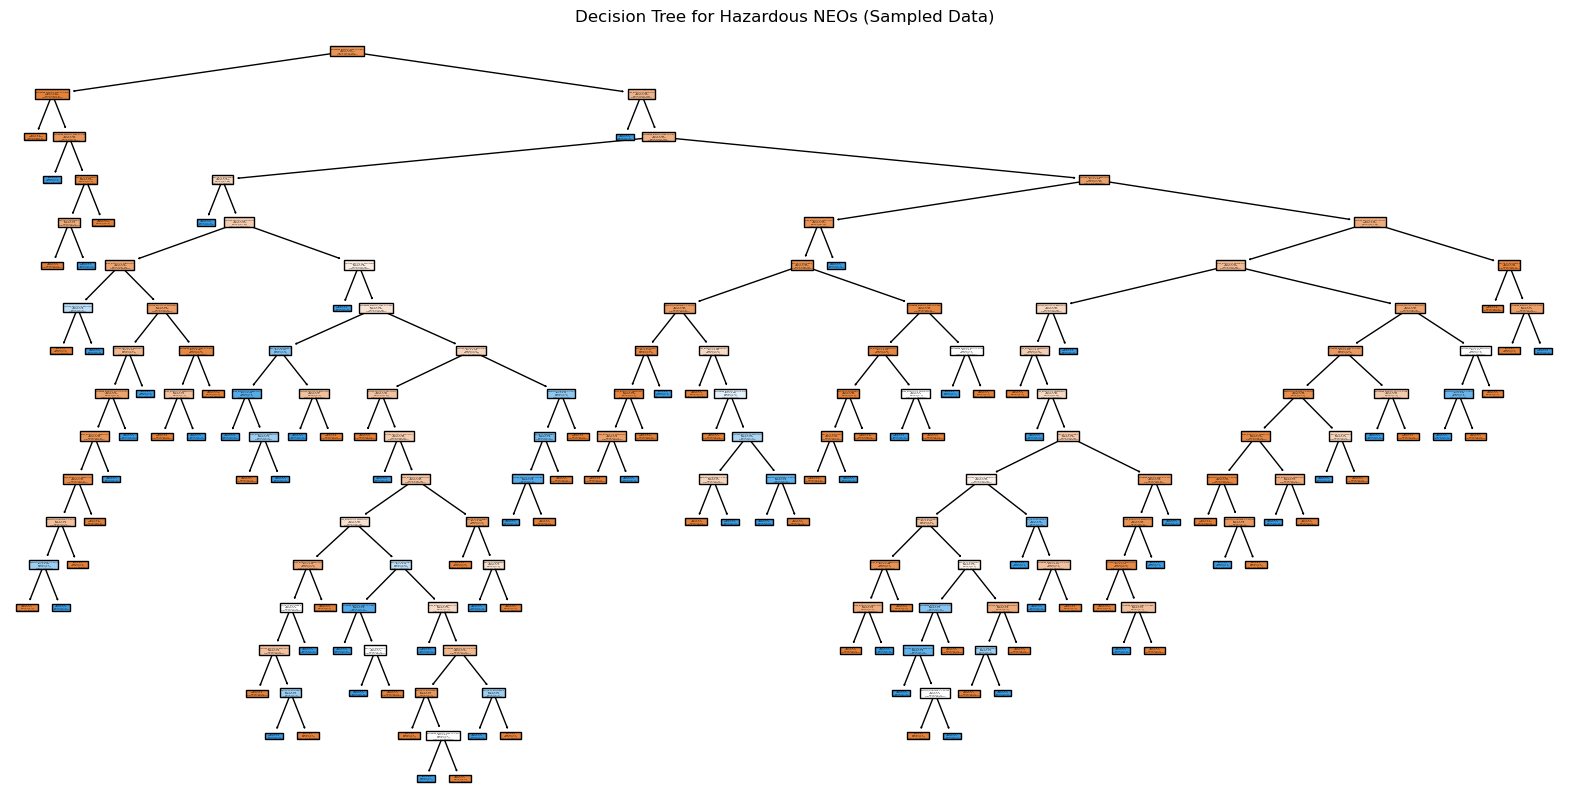

In [88]:
#plot the Decision Tree
# Sample a smaller portion of the data for training
data_sample = data.sample(n=1000, random_state=42)  # Adjust the sample size as needed
X_sample = data_sample.drop('is_hazardous', axis=1)
y_sample = data_sample['is_hazardous']

# Recreate and fit the Decision Tree classifier on the sample
clf_sample = DecisionTreeClassifier(random_state=42)
clf_sample.fit(X_sample, y_sample)

# Plot
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_sample, filled=True, feature_names=X_sample.columns.tolist(), class_names=['Not Hazardous', 'Hazardous'])
plt.title('Decision Tree for Hazardous NEOs (Sampled Data)')
plt.show()

QUESTION 5 - Impose a max_depth constraint on the tree construction. Construct the tree again and check the 
accuracies. Visualize the tree constructed with max_depth constraint

In [103]:
# Create and fit the Decision Tree classifier with max_depth constraint
max_depth_value = 3  # Set your desired max depth
clf = DecisionTreeClassifier(max_depth=max_depth_value, random_state=42)
clf.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracies
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8844
Testing Accuracy: 0.8834


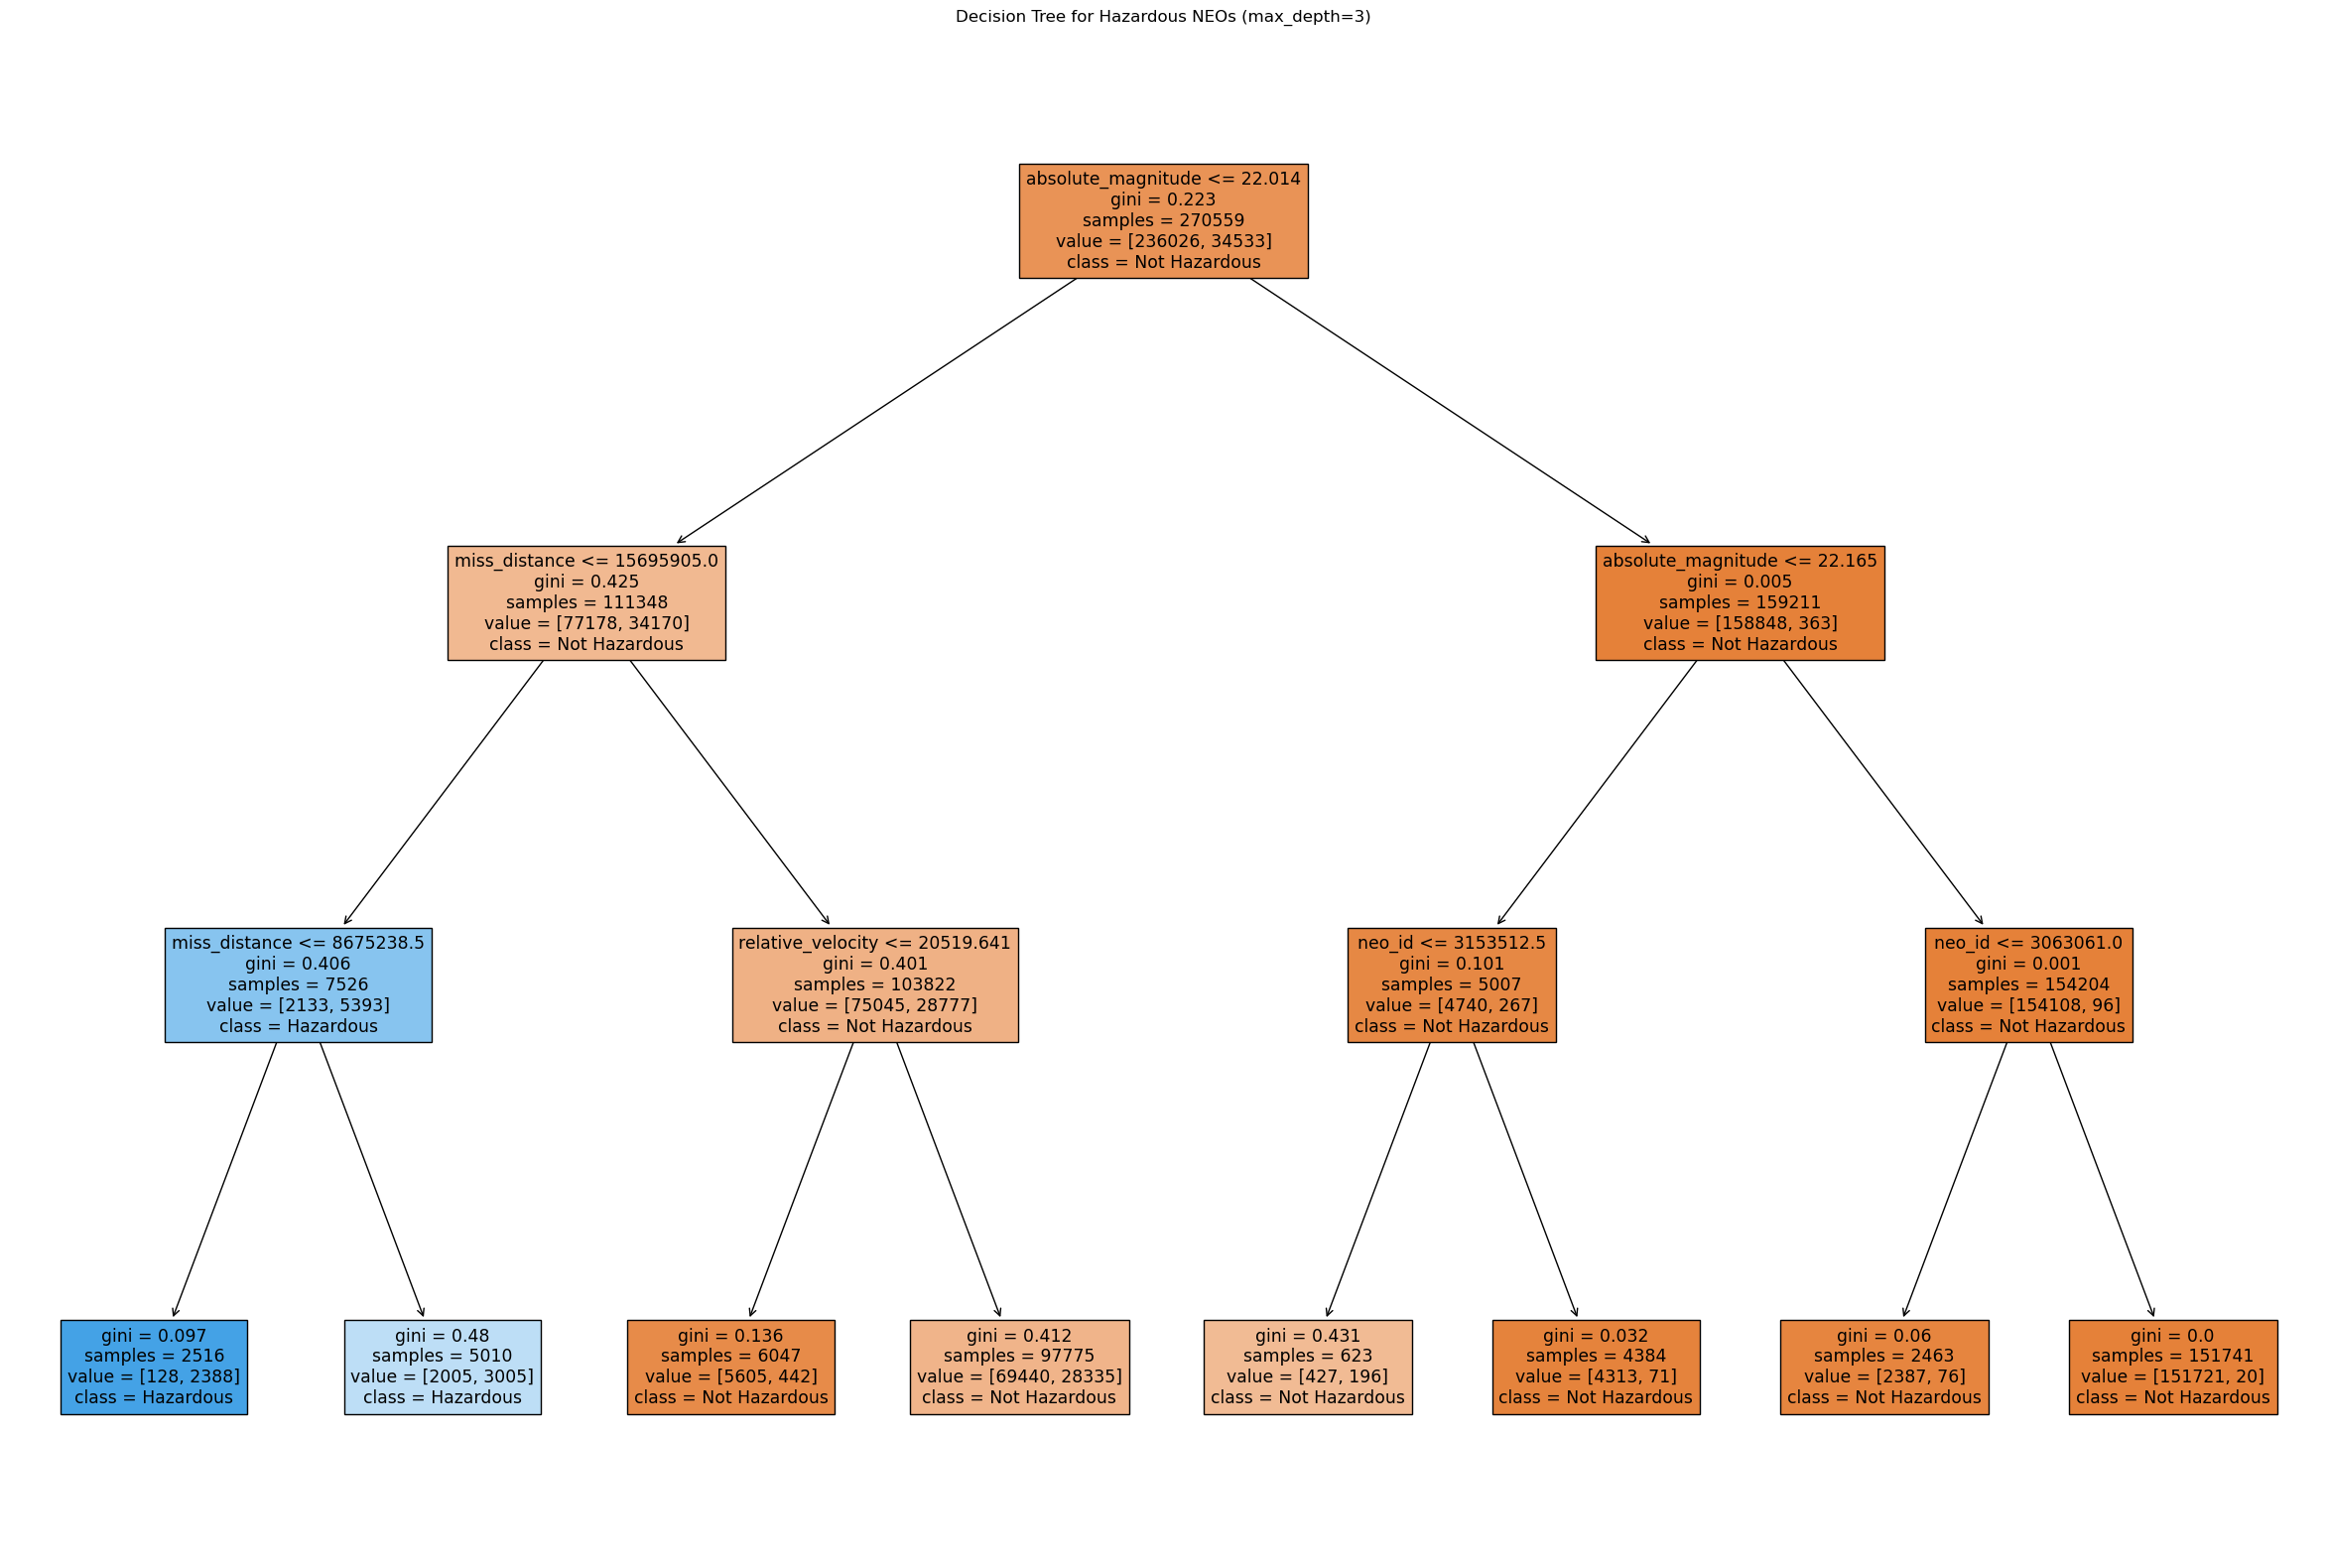

In [105]:
# Plot the Decision Tree
plt.figure(figsize=(30, 20))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Not Hazardous', 'Hazardous'])
plt.title(f'Decision Tree for Hazardous NEOs (max_depth={max_depth_value})')
plt.show()

QUESTION 6 - Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study 
the model & graph. Find the differences between the default criterion and entropy criterion.y")

In [108]:
# Create and fit the Decision Tree classifier with criterion set to 'entropy'
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf_entropy.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred_entropy = clf_entropy.predict(X_train)
y_test_pred_entropy = clf_entropy.predict(X_test)

# Calculate accuracies
train_accuracy_entropy = clf_entropy.score(X_train, y_train)
test_accuracy_entropy = clf_entropy.score(X_test, y_test)

print(f"Training Accuracy (Entropy): {train_accuracy_entropy:.4f}")
print(f"Testing Accuracy (Entropy): {test_accuracy_entropy:.4f}")

Training Accuracy (Entropy): 0.8845
Testing Accuracy (Entropy): 0.8843


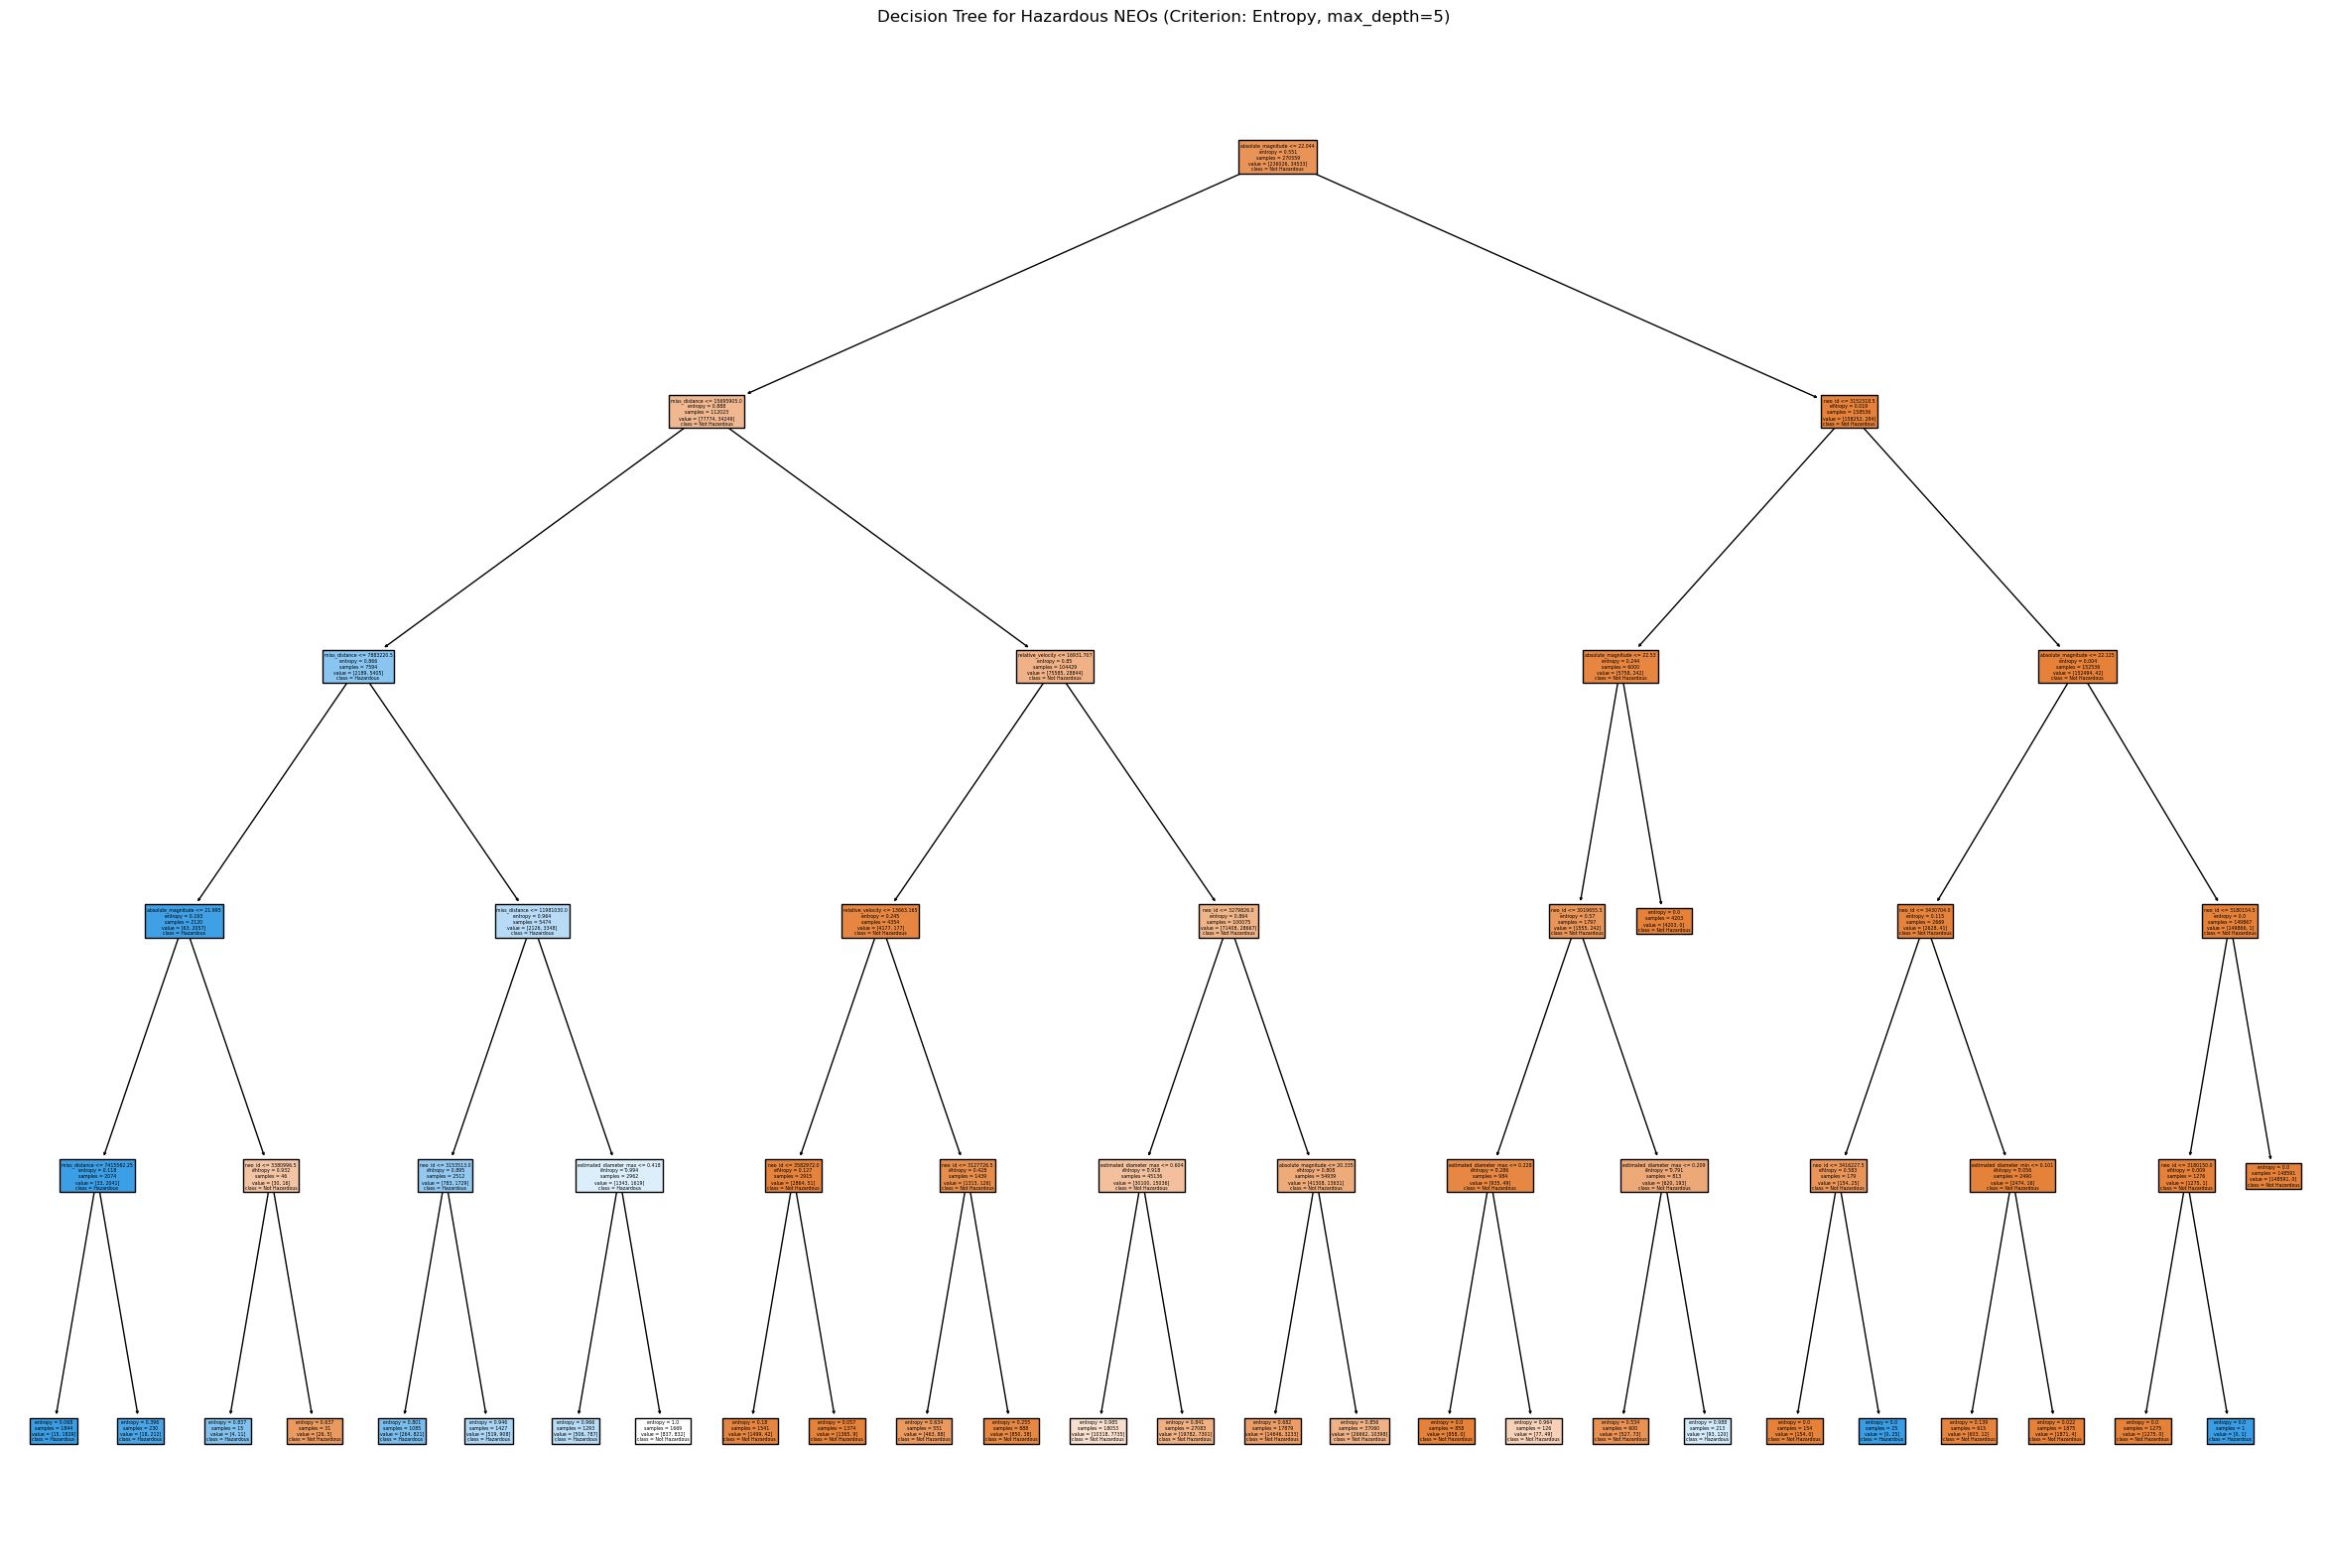

In [110]:
# Plot the Decision Tree
plt.figure(figsize=(30, 20))
plot_tree(clf_entropy, filled=True, feature_names=X.columns.tolist(), class_names=['Not Hazardous', 'Hazardous'])
plt.title('Decision Tree for Hazardous NEOs (Criterion: Entropy, max_depth=5)')
plt.show()